In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import nltk.cluster.kmeans as nltk
from nltk.cluster.util import cosine_distance as cd
from nltk.cluster import KMeansClusterer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
import random
import matplotlib.cm as cm

**Part 1 - Clustering**

In [2]:
#Reading the downloaded file into a matrix M(mXn).
M = pd.read_csv('digitData0.csv', delimiter=",", header=None)
type(M)

pandas.core.frame.DataFrame

In [3]:
#Creating an empty numpy array X with m rows an d n-1 columns.
X = np.empty((M.shape),dtype = float)
X.shape

(1549, 65)

In [4]:
#Assigning all m rows and first n-1 columns of M into X.
X = M.iloc[:,:-1]
#Creating a numpy vector trueLabels and assign n-th column of M into that.
trueLabels = M.iloc[:,-1]

#Printing dimensions of M, X and trueLabels.
print("Shapes :\n M :{} \n X : {}\n trueLabels: {} ".format(M.shape,X.shape,trueLabels.shape))

Shapes :
 M :(1549, 65) 
 X : (1549, 64)
 trueLabels: (1549,) 


In [5]:
#Performing K-means clustering with 5 clusters and function by default uses
#Euclidean distance as similarity measure.
model = KMeans(n_clusters = 5,n_init=50, random_state=4)
model.fit(X)
centroids = model.cluster_centers_
labels    = model.labels_

In [6]:
#Evaluating clustering performance using ARI and AMI
#At this stage, ARI is approximately 0.3978 
#i.e. similarity between true labels and fitted labels is 39.78%
metrics.adjusted_rand_score(labels,trueLabels)

0.3794879162136016

In [7]:
#At this stage, AMI score is approximately 0.477904
metrics.adjusted_mutual_info_score(labels,trueLabels)

0.5700591990064284

In [8]:
#Kmeans clustering with 50 random initializations
randIndex = list()
mutualInfo = list()
for i in range(50):
    model1 = KMeans(n_clusters = 5,n_init=50, random_state = i)
    model1.fit(X)
    randIndex.append(metrics.adjusted_rand_score(model1.labels_,trueLabels))
    mutualInfo.append(metrics.adjusted_mutual_info_score(model1.labels_,trueLabels))

In [9]:
#Clustering performance over 50 random initialization of K-means

#Average Adjusted Rand Index is 37.96%. Using two tail hypothesis test where null hypothesis is mean of
#ARI = 37.95% # and alternate hypothesis is mean of ARI ≠ 37.95%. At 5% significance level we accept
#null hypothesis and conclude that there is sufficient evidence to conclude that there ARI = AARI.
np.mean(randIndex)
np.std(randIndex)

0.0025996373918855758

Text(0, 0.5, 'Mutual Info Score')

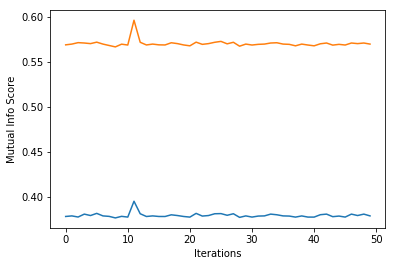

In [10]:
#Average Adjusted Mutual Info is 0.477968. Using two tail hypothesis test where null hypothesis is mean of
#AMI = 0.478 and alternate hypothesis is mean of ARI ≠ 0.478. At 5% significance level we accept
#null hypothesis and conclude that there is sufficient evidence to conclude that there AMI = AAMI.
np.mean(mutualInfo)
np.std(mutualInfo)

#Plot of ARI and AMI over 50 iterations. From plot, it seems there is spike between 10 and 14 iterations
#which are outliers
plt.plot(randIndex)
plt.xlabel("Iterations")
plt.ylabel("Rand Index")
plt.plot(mutualInfo)
plt.xlabel("Iterations")
plt.ylabel("Mutual Info Score")

In [ ]:
#KMeans algorithm for SKlearn has three initialization methods; k-means++ which selects initial 
#cluster centres in a smart way to speed up convergence, 'random' which chooses k observations at
#random from data for the initial centroids, and 'ndarray' which is user defined initial centres.
#We can set the iterations of the initialization which runs with different centroid seeds. 
#However, the final results will be the best output out of all the iterations. Accuracy of the clusters
#depends on optimum number of clusters and centroids identified by the algorithm or defined by the user.
#If we run KMeans algorithm 20 times, ARI value and AMI value of single run should be within the range
#of average ARI and average AMI. Thus, we can say that ARI value of single run will be similar to the
#average ARI value over 20 runs of KMeans algorithm. This has been shown via hypothesis.

In [11]:
#Converting X to numpy array
A = np.array(X)
A.shape
type(A)

#Defining model using cosine distance similarity measure
rng = random.Random()
rng.seed(101)
model2 = KMeansClusterer(5,cd,repeats = 50, avoid_empty_clusters=True,rng = rng)
assigned_clusters = model2.cluster(A, assign_clusters=True)
labels2 = np.array(model2.cluster(A, True, trace=True))
metrics.adjusted_rand_score(labels2,trueLabels)
metrics.adjusted_mutual_info_score(labels2,trueLabels)

#ARI of Kmeans cluster algorithm using cosine distance similarity measure is 39.64% and AMI is 0.4709
#ARI of Kmeans cluster algorithm using Euclidean distance similarity measure is 39.78% and AMI is 0.477
#Accuracy of the clustering for both the similarity measure is similar.

k-means trial 0
iteration
k-means trial 1
iteration
k-means trial 2
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 3
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 4
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 5
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 6
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteratio

iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 43
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 44
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 45
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 46
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 47
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
itera

0.5570168971828294

**Part 2 - Dimension reductionality** 

[ 12.24  21.93  30.37  36.95  41.85  46.1   50.1   53.49  56.54  59.43
  62.22  64.72  67.02  69.21  71.37  73.3   75.05  76.67  78.24  79.71
  81.01  82.25  83.43  84.47  85.43  86.34  87.22  88.07  88.87  89.58
  90.29  90.96  91.61  92.25  92.82  93.37  93.88  94.35  94.79  95.2
  95.6   95.97  96.33  96.67  96.99  97.29  97.58  97.85  98.1   98.32
  98.53  98.72  98.91  99.09  99.26  99.42  99.57  99.71  99.83  99.93
 100.01 100.01 100.01 100.01]


Text(0, 0.5, 'Variance')

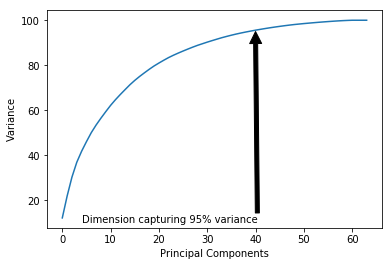

In [12]:
#Minimum dimension that captures at least 95% variance is 40 (95.2% variance).

#Normolizing data
Xnorm = scale(X)

#PCA for all components in the dataset.
pca = PCA(n_components = Xnorm.shape[1] )
Z = pca.fit_transform(Xnorm)
pca_var = pca.explained_variance_ratio_
cumvar = np.cumsum(np.round(pca_var,decimals = 4)*100)
min_dim = np.count_nonzero(cumvar <= 95)+1
min_dim
print(cumvar)
plt.plot(cumvar)
plt.annotate('Dimension capturing 95% variance',xytext=(4, 10),xy=(min_dim,95),arrowprops={'facecolor':'black'})
plt.xlabel("Principal Components")
plt.ylabel("Variance")

In [13]:
#Error 0.0000000000000020483 of the dimension reduction
X_rec = pca.inverse_transform(Z)
err = np.linalg.norm(Xnorm-X_rec,'fro')/np.linalg.norm(Xnorm,'fro')
err

2.0487120650973002e-15

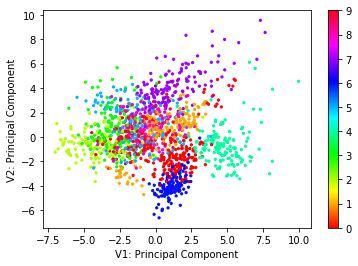

In [14]:
pca1 = PCA(n_components = 2)
Z1= pca1.fit_transform(Xnorm)
V1 = Z1[:,0]
V2 = Z1[:,1]
plt.scatter(V1,V2, c=trueLabels, s=5, cmap=cm.hsv)
cbar= plt.colorbar()
plt.xlabel("V1: Principal Component")
plt.ylabel("V2: Principal Component")
plt.show()